In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn lightgbm 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('updated_dataset2.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Temperature (Celsius),humidity,Wind_Speed,Pressure,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,-2.125738,73.970886,16.196340,1001.441549,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,31.372653,36.893461,24.457904,1028.627200,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,31.225854,20.299959,6.336927,1024.232406,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,-18.861689,80.744448,11.979423,1011.078022,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,36.347602,79.559794,16.292421,1002.499833,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,-14.545855,68.309549,17.860604,996.337913,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,17.435351,0.620648,15.400608,1022.433472,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,25.660732,39.019277,27.229913,1010.080680,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,23.603476,36.811577,15.166898,1028.477798,Satisfactory


In [4]:
print(df.isnull().sum())

City                         0
Date                         0
PM2.5                     4598
PM10                     11140
NO                        3582
NO2                       3585
NOx                       4185
NH3                      10328
CO                        2059
SO2                       3854
O3                        4022
Benzene                   5623
Toluene                   8041
Xylene                   18109
AQI                       4681
Temperature (Celsius)        0
humidity                     0
Wind_Speed                   0
Pressure                     0
AQI_Bucket                4681
dtype: int64


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Temperature (Celsius),humidity,Wind_Speed,Pressure
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,10.180187,49.973843,15.029429,1013.240725
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,17.397705,28.938837,8.654495,9.935098
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,-19.998923,0.003505,0.000072,974.247386
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,-5.067822,24.787037,7.546210,1006.466372
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,10.259125,49.962575,14.978062,1013.242840
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,25.323984,74.947374,22.593249,1019.953953
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,39.999152,99.997231,29.999362,1050.812702


In [6]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

C:\Users\veeru\AppData\Local\Temp\ipykernel_14384\1167282342.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=df['Date'].apply(pd.to_datetime)


In [7]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Temperature (Celsius)',
       'humidity', 'Wind_Speed', 'Pressure', 'AQI_Bucket'],
      dtype='object')

In [8]:
df.iloc[: ,1:13].dtypes

PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
dtype: object

In [9]:
print(df.isnull().sum())

City                         0
PM2.5                     4598
PM10                     11140
NO                        3582
NO2                       3585
NOx                       4185
NH3                      10328
CO                        2059
SO2                       3854
O3                        4022
Benzene                   5623
Toluene                   8041
Xylene                   18109
AQI                       4681
Temperature (Celsius)        0
humidity                     0
Wind_Speed                   0
Pressure                     0
AQI_Bucket                4681
dtype: int64


In [10]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['NO'].fillna(df['NO'].mean(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['SO2'].fillna(df['SO2'].mean(), inplace=True)

df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['NH3'].fillna(df['NH3'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace=True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace=True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace=True)


C:\Users\veeru\AppData\Local\Temp\ipykernel_14384\2947594316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
C:\Users\veeru\AppData\Local\Temp\ipykernel_14384\2947594316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
print(df.isnull().sum())

City                        0
PM2.5                       0
PM10                        0
NO                          0
NO2                         0
NOx                         0
NH3                         0
CO                          0
SO2                         0
O3                          0
Benzene                     0
Toluene                     0
Xylene                      0
AQI                      4681
Temperature (Celsius)       0
humidity                    0
Wind_Speed                  0
Pressure                    0
AQI_Bucket               4681
dtype: int64


In [12]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Temperature (Celsius),humidity,Wind_Speed,Pressure,AQI_Bucket
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,NaN,-2.125738,73.970886,16.196340,1001.441549,NaN
2015-02-01,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,NaN,31.372653,36.893461,24.457904,1028.627200,NaN
2015-03-01,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,NaN,31.225854,20.299959,6.336927,1024.232406,NaN
2015-04-01,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,NaN,-18.861689,80.744448,11.979423,1011.078022,NaN
2015-05-01,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,NaN,36.347602,79.559794,16.292421,1002.499833,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,-14.545855,68.309549,17.860604,996.337913,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,17.435351,0.620648,15.400608,1022.433472,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,25.660732,39.019277,27.229913,1010.080680,Satisfactory


In [13]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [14]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [15]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Wind_Speed,Pressure,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,...,16.196340,1001.441549,NaN,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,...,24.457904,1028.627200,NaN,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,...,6.336927,1024.232406,NaN,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,...,11.979423,1011.078022,NaN,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,...,16.292421,1002.499833,NaN,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,17.860604,996.337913,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,15.400608,1022.433472,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,27.229913,1010.080680,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [16]:
print(df.isnull().sum())

City                        0
PM2.5                       0
PM10                        0
NO                          0
NO2                         0
NOx                         0
NH3                         0
CO                          0
SO2                         0
O3                          0
Benzene                     0
Toluene                     0
Xylene                      0
AQI                         0
Temperature (Celsius)       0
humidity                    0
Wind_Speed                  0
Pressure                    0
AQI_Bucket               4681
PM10_SubIndex               0
PM2.5_SubIndex              0
SO2_SubIndex                0
NOx_SubIndex                0
NH3_SubIndex                0
CO_SubIndex                 0
O3_SubIndex                 0
dtype: int64


In [17]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [18]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Wind_Speed,Pressure,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,...,16.196340,1001.441549,Moderate,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,...,24.457904,1028.627200,Moderate,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,...,6.336927,1024.232406,Poor,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,...,11.979423,1011.078022,Moderate,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,...,16.292421,1002.499833,Very Poor,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,17.860604,996.337913,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,15.400608,1022.433472,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,27.229913,1010.080680,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [19]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [20]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Temperature (Celsius)',
       'humidity', 'Wind_Speed', 'Pressure', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [21]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Temperature (Celsius)',
       'humidity', 'Wind_Speed', 'Pressure', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

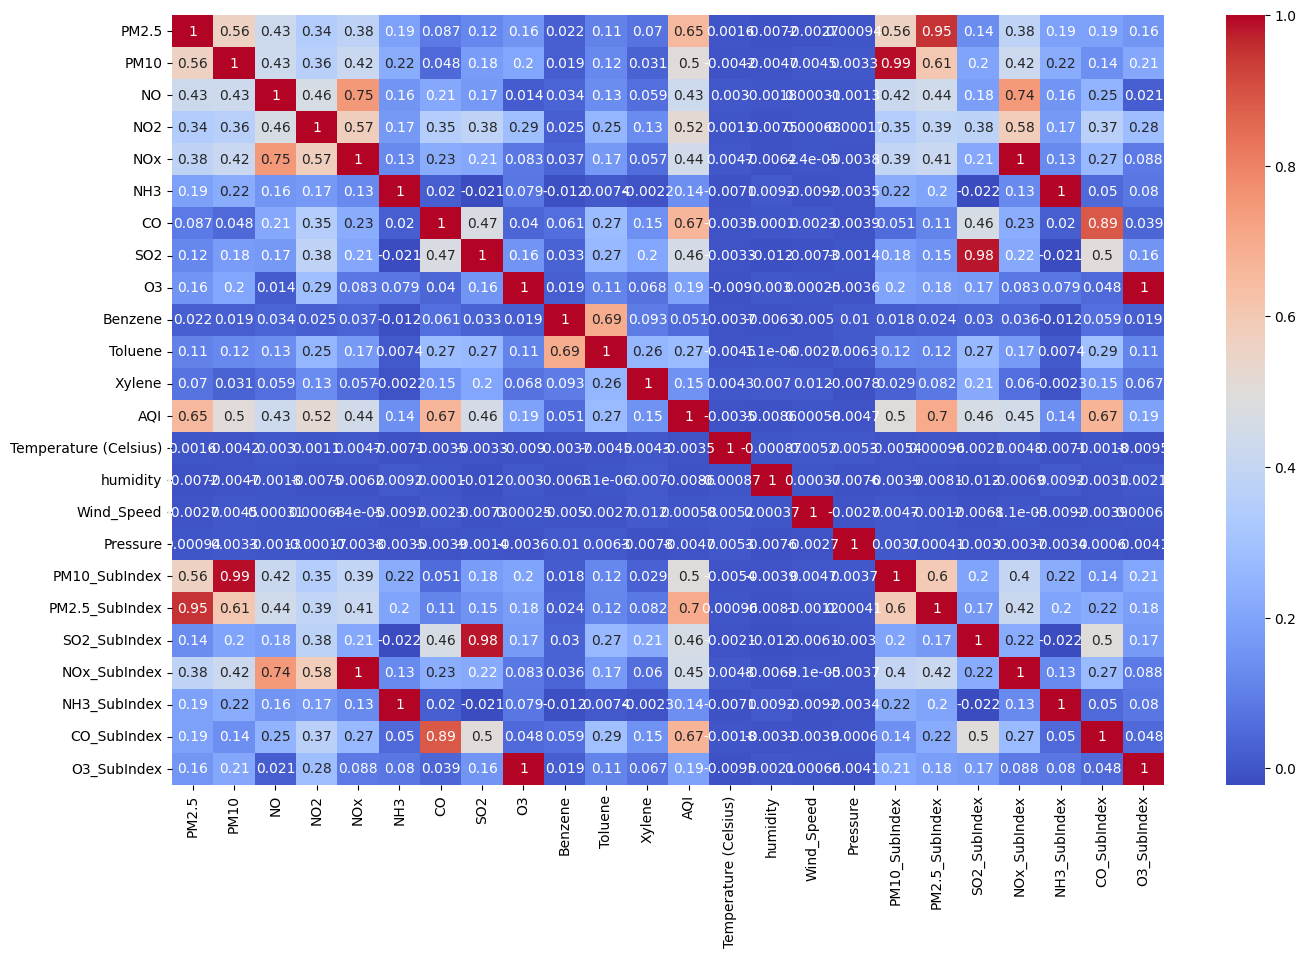

In [22]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True);

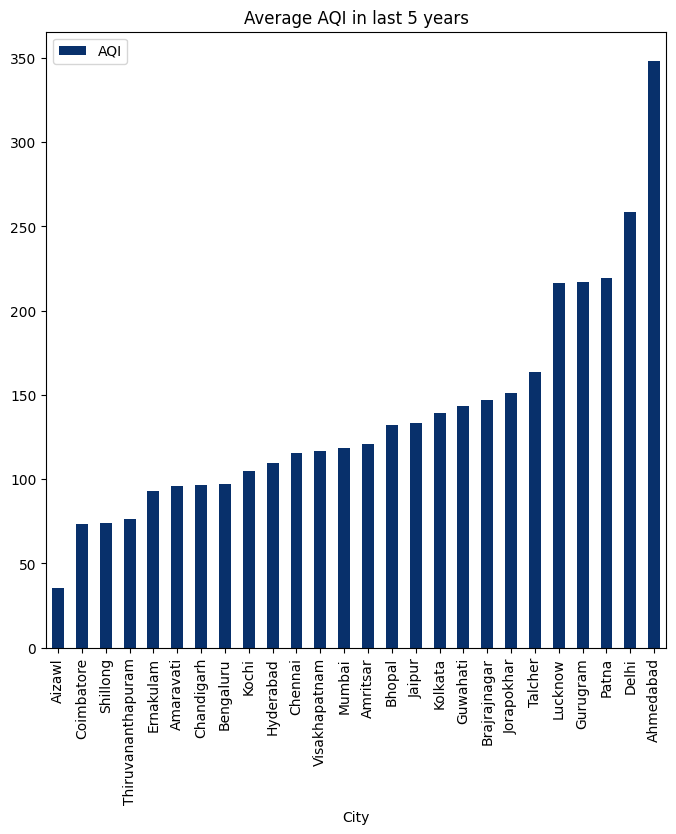

In [23]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [24]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2015-01-01,149.0,Moderate
2015-02-01,123.0,Moderate
2015-03-01,300.0,Poor
2015-04-01,123.0,Moderate
2015-05-01,329.0,Very Poor
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [25]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [26]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2015-01-01,149.0,2
2015-02-01,123.0,2
2015-03-01,300.0,3
2015-04-01,123.0,2
2015-05-01,329.0,4


In [27]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Temperature (Celsius)',
       'humidity', 'Wind_Speed', 'Pressure', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Wind_Speed,Pressure,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,...,16.196340,1001.441549,Moderate,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,0,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,...,24.457904,1028.627200,Moderate,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,0,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,...,6.336927,1024.232406,Poor,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,0,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,...,11.979423,1011.078022,Moderate,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,0,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,...,16.292421,1002.499833,Very Poor,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,25,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,17.860604,996.337913,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,25,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,15.400608,1022.433472,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,25,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,27.229913,1010.080680,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000


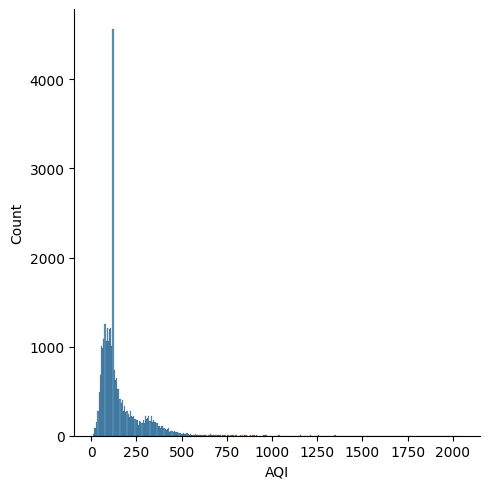

In [30]:
sns.displot(df['AQI'])

In [31]:
df['AQI'] = np.log(1+df['AQI'])

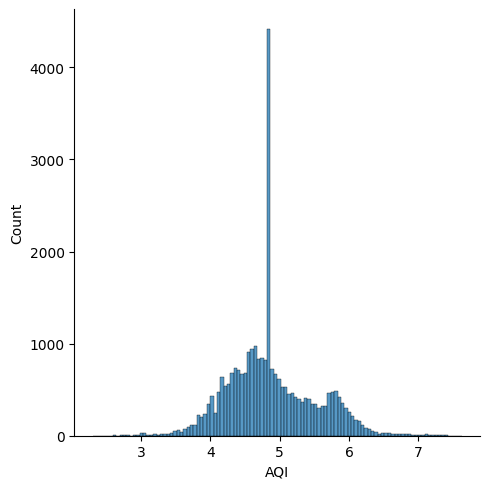

In [32]:
sns.displot(df['AQI'])

In [33]:
X = df.drop(columns=['AQI_Bucket', 'AQI','PM10','PM2.5','SO2','NOx','NH3','CO','O3'])
y = df[['AQI']]

In [34]:
X

,City,NO,NO2,Benzene,Toluene,Xylene,Temperature (Celsius),humidity,Wind_Speed,Pressure,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,
2015-01-01,0,0.92,18.22,0.00000,0.020000,0.000000,-2.125738,73.970886,16.196340,1001.441549,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,0,0.97,15.69,3.68000,5.500000,3.770000,31.372653,36.893461,24.457904,1028.627200,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,0,17.40,19.30,6.80000,16.400000,2.250000,31.225854,20.299959,6.336927,1024.232406,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,0,1.70,18.48,4.43000,10.140000,1.000000,-18.861689,80.744448,11.979423,1011.078022,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,0,22.10,21.42,7.01000,18.890000,2.780000,36.347602,79.559794,16.292421,1002.499833,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,25,7.68,25.06,2.24000,12.070000,0.730000,-14.545855,68.309549,17.860604,996.337913,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,25,3.42,26.06,0.74000,2.210000,0.380000,17.435351,0.620648,15.400608,1022.433472,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,25,3.45,29.53,0.01000,0.010000,0.000000,25.660732,39.019277,27.229913,1010.080680,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [35]:
X['City'].unique

<bound method Series.unique of Date
2015-01-01     0
2015-02-01     0
2015-03-01     0
2015-04-01     0
2015-05-01     0
              ..
2020-06-27    25
2020-06-28    25
2020-06-29    25
2020-06-30    25
2020-01-07    25
Name: City, Length: 29531, dtype: int32>

In [36]:
y

,AQI
Date,
2015-01-01,5.010635
2015-02-01,4.820282
2015-03-01,5.707110
2015-04-01,4.820282
2015-05-01,5.799093
...,...
2020-06-27,3.737670
2020-06-28,4.262680
2020-06-29,4.234107


In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [38]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    train_pred = model.predict(X_train)
    print(train_pred)
    train_pred_log = np.exp(train_pred)-1
    print(train_pred_log)
    # Perform cross-validation on the training set
    train_cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    train_cv_score = np.abs(np.mean(train_cv_score))
    
    print("Training Data Report")
    print("MSE (Training):", mean_squared_error(y_train, train_pred))
    print("CV Score (Training):", train_cv_score) 
    print("R2 score Training : " ,r2_score(y_train, train_pred))
    
    # Predict on the testing set
    test_pred = model.predict(X_test)
    test_pred_log = np.exp(test_pred)-1
    print(test_pred_log)
    # Evaluate on the testing set
    test_mse = mean_squared_error(y_test, test_pred)
    
    print("\nTesting Data Report")
    print("MSE (Testing):", test_mse)
    print("R2 score Testing : " ,r2_score(y_test, test_pred))

In [39]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
train_and_evaluate(model_l,X_train, y_train, X_test, y_test)

[[5.72335086]
 [5.06891241]
 [4.82794144]
 ...
 [4.4060412 ]
 [4.1651267 ]
 [4.57387371]]
[[304.9283308 ]
 [158.00130521]
 [123.95347146]
 ...
 [ 80.94441932]
 [ 63.40084142]
 [ 95.91881867]]
Training Data Report
MSE (Training): 0.07685389199194914
CV Score (Training): 0.07712935624408275
R2 score Training :  0.8048634027538214
[[149.81917816]
 [ 69.10864542]
 [ 64.1651915 ]
 ...
 [ 96.1657215 ]
 [115.5587228 ]
 [117.85004485]]

Testing Data Report
MSE (Testing): 0.08051918631228538
R2 score Testing :  0.7952947800195402


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Creating a Decision Tree Regressor
dt = DecisionTreeRegressor()
train_and_evaluate(dt,X_train, y_train, X_test, y_test)
# Creating a Random Forest Regressor

[5.59098698 4.95582706 4.94164242 ... 4.11087386 3.93182563 4.49980967]
[267. 141. 139. ...  60.  50.  89.]
Training Data Report
MSE (Training): 2.6906471361652204e-30
CV Score (Training): 0.07115919206385339
R2 score Training :  1.0
[123.  71.  57. ... 105. 123.  95.]

Testing Data Report
MSE (Testing): 0.06896559853521878
R2 score Testing :  0.824667651701269


In [41]:
rf_regressor = RandomForestRegressor()
train_and_evaluate(rf_regressor,X_train, y_train, X_test, y_test)

c:\Users\veeru\Desktop\proj\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[5.6151612  4.99571661 5.06087597 ... 4.20566971 3.95649502 4.53877217]
[273.55763561 146.77880713 156.72862171 ...  66.06549726  51.27378578
  92.57583394]


c:\Users\veeru\Desktop\proj\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\veeru\Desktop\proj\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\veeru\Desktop\proj\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\veeru\Desktop\proj\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

Training Data Report
MSE (Training): 0.004777200411923849
CV Score (Training): 0.03528405222417497
R2 score Training :  0.9878704043662029
[123.          61.57944102  49.79845669 ... 119.18046981 122.34418965
 127.44108944]

Testing Data Report
MSE (Testing): 0.03437964708460055
R2 score Testing :  0.9125960713014565


In [42]:
!pip install lightgbm catboost xgboost

In [43]:
from lightgbm import LGBMRegressor

# Creating a LightGBM Regressor
lgbm_regressor = LGBMRegressor()
train_and_evaluate(lgbm_regressor,X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3568
[LightGBM] [Info] Number of data points in the train set: 23624, number of used features: 17
[LightGBM] [Info] Start training from score 4.875272
[5.67292373 5.07116972 5.08408657 ... 4.25008249 3.98022432 4.56939294]
[289.88375719 158.36062593 160.43241416 ...  69.11119586  52.52904068
  95.48551948]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3529
[LightGBM] [Info] Number of data points in the train set: 18899, number of used features: 17
[LightGBM] [Info] Start training from score 4.868664

In [44]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor()
train_and_evaluate(cb,X_train, y_train, X_test, y_test)

Learning rate set to 0.067479
0:	learn: 0.5959062	total: 155ms	remaining: 2m 34s
1:	learn: 0.5660607	total: 167ms	remaining: 1m 23s
2:	learn: 0.5384355	total: 182ms	remaining: 1m
3:	learn: 0.5130226	total: 198ms	remaining: 49.2s
4:	learn: 0.4901250	total: 210ms	remaining: 41.8s
5:	learn: 0.4689178	total: 222ms	remaining: 36.9s
6:	learn: 0.4489949	total: 231ms	remaining: 32.8s
7:	learn: 0.4306540	total: 241ms	remaining: 29.9s
8:	learn: 0.4130733	total: 248ms	remaining: 27.3s
9:	learn: 0.3975243	total: 257ms	remaining: 25.5s
10:	learn: 0.3825054	total: 263ms	remaining: 23.7s
11:	learn: 0.3693301	total: 273ms	remaining: 22.5s
12:	learn: 0.3567462	total: 279ms	remaining: 21.2s
13:	learn: 0.3451691	total: 290ms	remaining: 20.4s
14:	learn: 0.3348189	total: 296ms	remaining: 19.4s
15:	learn: 0.3253983	total: 306ms	remaining: 18.8s
16:	learn: 0.3162764	total: 312ms	remaining: 18s
17:	learn: 0.3071498	total: 321ms	remaining: 17.5s
18:	learn: 0.2994211	total: 327ms	remaining: 16.9s
19:	learn: 0.2

In [45]:
import pickle

In [46]:
with open('cb_model.pkl', 'wb') as file:
    pickle.dump(cb, file)